In [1]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [2]:
con = psycopg2.connect(host='localhost', database='imobiliaria', user='postgres', password='Dani.rosa2')
cur = con.cursor()

In [3]:
from flask import Flask, request

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 18:56:46] "GET /informar_metros/2500/4000 HTTP/1.1" 404 -


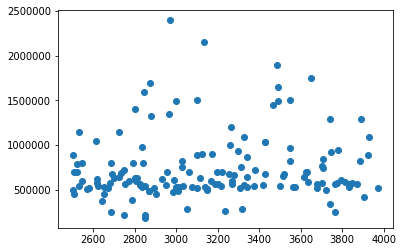

127.0.0.1 - - [10/Feb/2020 18:57:30] "GET /informa_metros/2500/4000 HTTP/1.1" 200 -


In [6]:
app = Flask(__name__)

@app.route("/informa_metros/<area_min>/<area_max>", methods = ['GET'])
def seleciona_metro(area_min, area_max):
    query = "SELECT area, preco FROM info_casas WHERE area BETWEEN {area_min} AND {area_max}".format(area_min = area_min, area_max = area_max)
    try:
        df = pd.read_sql(query, con)
        plt.scatter(df.area, df.preco)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possivel executar a query", 500

app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 18:58:02] "GET /top_precos HTTP/1.1" 404 -


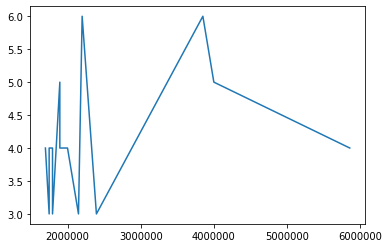

127.0.0.1 - - [10/Feb/2020 18:58:12] "GET /top_preco HTTP/1.1" 200 -


In [7]:
app = Flask(__name__)

@app.route("/top_preco", methods = ['GET'])
def top_preco():
    query = "SELECT qte_quartos, preco FROM info_casas ORDER BY preco DESC LIMIT 15"
    try:
        df = pd.read_sql(query, con)
        plt.plot(df.preco, df.qte_quartos)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possivel executar a query", 500

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


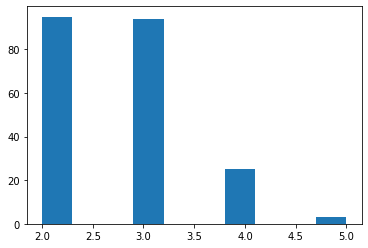

127.0.0.1 - - [10/Feb/2020 18:59:01] "GET /quantidade_banheiro/2 HTTP/1.1" 200 -
127.0.0.1 - - [10/Feb/2020 19:00:30] "PUT /update HTTP/1.1" 404 -
127.0.0.1 - - [10/Feb/2020 19:00:42] "PUT /update HTTP/1.1" 404 -
127.0.0.1 - - [10/Feb/2020 19:00:55] "PUT /update HTTP/1.1" 404 -
127.0.0.1 - - [10/Feb/2020 19:01:40] "PUT /update HTTP/1.1" 404 -


In [8]:
app = Flask(__name__)

@app.route("/quantidade_banheiro/<qte_banheiros>", methods = ['GET'])
def banheiro(qte_banheiros):
    query = "SELECT * FROM info_casas WHERE qte_banheiros = {qte_banheiros}".format(qte_banheiros = qte_banheiros)
    try:
        df = pd.read_sql(query, con)
        plt.hist(df.qte_quartos, bins = 10)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return 'Erro!', 500
    
app.run()

In [10]:
app = Flask(__name__)

@app.route("/update", methods = ['PUT'])

def update():
    post_args = request.json
    
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    if "qte_quartos" in post_args:
        query = "UPDATE info_casas SET qte_quartos = '{qte_quartos}' WHERE cep = '{cep}'".format(
            qte_quartos = post_args["qte_quartos"], cep = post_args["cep"])
        cur.execute(query)
        
    if "qte_banheiros" in post_args:
        query = "UPDATE info_casas SET qte_banheiros = '{qte_banheiros}' WHERE cep = '{cep}'".format(
            qte_banheiros = post_args["qte_banheiros"], cep = post_args["cep"])
        cur.execute(query)
        
    if "area" in post_args:
        query = "UPDATE info_casas SET area = '{area}' WHERE cep = '{cep}'".format(
            area = post_args["area"], cep = post_args["cep"])
        cur.execute(query)
        
    if "preco" in post_args:
        query = "UPDATE info_casas SET preco = '{preco}' WHERE cep = '{cep}'".format(
            preco = post_args["preco"], cep = post_args["cep"])
        cur.execute(query)
        
    con.commit()
    
    return "sucesso", 200
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 19:02:13] "PUT /update HTTP/1.1" 200 -


In [11]:
app = Flask(__name__)

@app.route("/deletar_endereco", methods=['DELETE'])

def deletar_imovel():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    query = "DELETE FROM info_casas WHERE cep = {cep};".format(cep=post_args["cep"])
    cur.execute(query)
    con.commit()
    return "Imovel deletado com sucesso!", 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2020 19:03:05] "DELETE /deletar_endereco HTTP/1.1" 200 -
